In [195]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from scipy.spatial import distance

In [197]:
df = pd.read_csv('dataset.csv',index_col=0)
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


# Basic Information

In [200]:
ncols, nrows = df.shape
print(f'Dataset has {ncols} rows and {nrows} columns')

Dataset has 114000 rows and 20 columns


The Spotify track dataset comprises individual records, each representing a distinct song. The dataset encompasses identifying attributes such as track ID, title, and artist alongside a range of audio features including danceability, energy, loudness, and speechiness.

# Checking for Duplicates

In [204]:
duplicated_rows = df.duplicated().sum()

if duplicated_rows == 0:
    print('There are 0 rows that are duplicated, which means each row in the DataFrame is unique.')
    print('So that we do not need to continue processing duplicate lines')
else:
    print(f'There are {duplicated_rows} rows that are duplicated so we need to drop those {duplicated_rows} rows')
    df = df.drop_duplicates()
    print(f'After drop duplicated rows, there are {df.shape[0]} rows left')

There are 450 rows that are duplicated so we need to drop those 450 rows
After drop duplicated rows, there are 113550 rows left


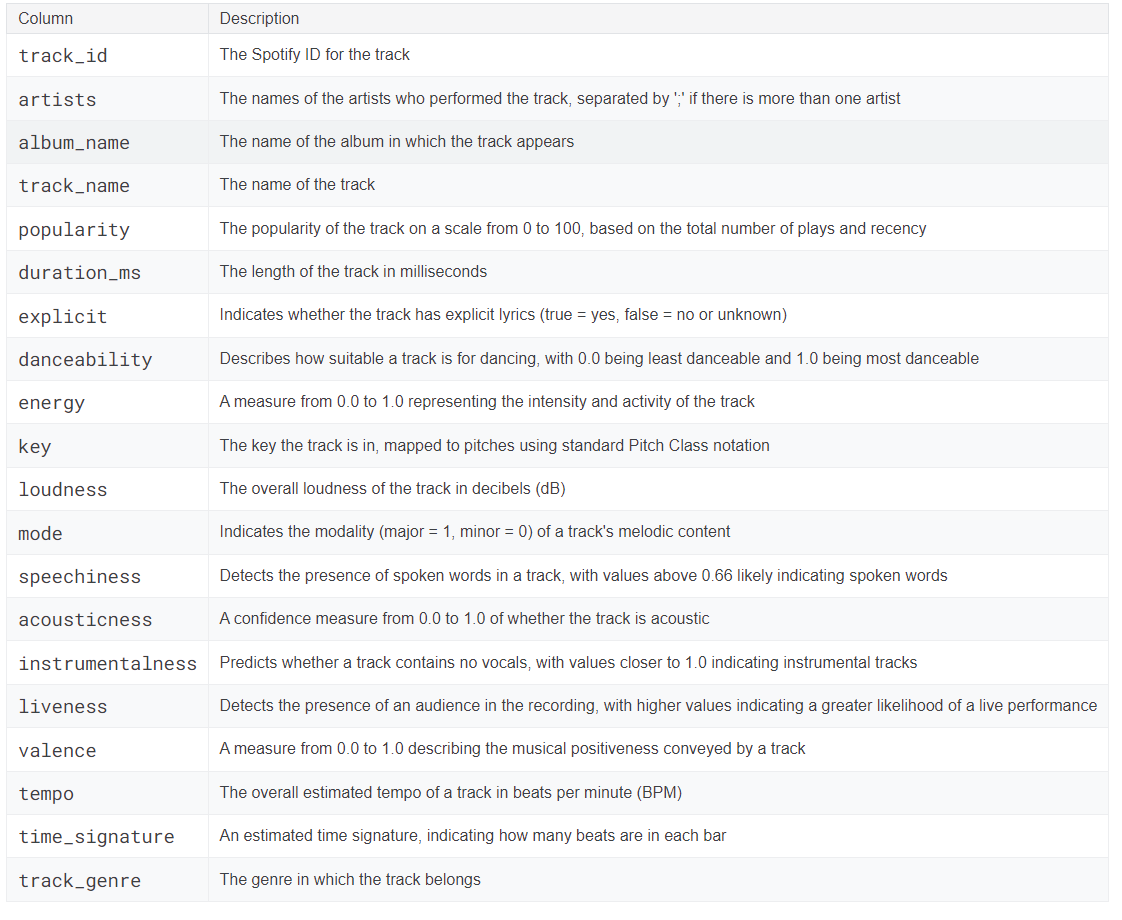

Using dtypes to explore the data types of columns in the dataset

In [208]:
df.dtypes.to_frame('Data Type')

,Data Type
track_id,object
artists,object
album_name,object
track_name,object
popularity,int64
duration_ms,int64
explicit,bool
danceability,float64
energy,float64
key,int64


To gain a deeper understanding of columns with the object data type, we will employ the open_object_dtype() function to categorize them into their respective subtypes.

In [211]:
def open_object_dtype(s):
    dtypes = set()
    dtypes.update(s.apply(type))
    return dtypes

obj_cols = df.select_dtypes(include='object').columns
df[obj_cols].apply(open_object_dtype, axis=0).to_frame('Data Type')

,Data Type
track_id,{<class 'str'>}
artists,"{<class 'str'>, <class 'float'>}"
album_name,"{<class 'str'>, <class 'float'>}"
track_name,"{<class 'str'>, <class 'float'>}"
track_genre,{<class 'str'>}


An analysis reveals that three columns – artists, album_name, and track_name – exhibit inconsistent data types, containing both string (str) and floating-point (float) values. This discrepancy is likely attributed to the presence of NaN values within these columns, as NaN is a floating-point data type.

#  Missing values in each row 

In [215]:
# Missing values in each row
missing_values_per_row = df.isnull().sum(axis=1)
count_per_missing_value = missing_values_per_row.value_counts().sort_index()

# Print the results
for missing, rows in count_per_missing_value.items():
    print(f'{rows} row(s) have {missing} missing values')

total_rows_with_missing_values = (df.isnull().any(axis=1)).sum()
print(f'Total number of rows with missing values: {total_rows_with_missing_values}')

113549 row(s) have 0 missing values
1 row(s) have 3 missing values
Total number of rows with missing values: 1


# Numerical columns 
We need to extract all numerical columns and store them in the variable numerical_cols

In [218]:
numerical_cols = df[df.columns[(df.dtypes == 'float64') | (df.dtypes == 'int64')]]
numerical_cols.shape

(113550, 14)

In [220]:
numerical_cols.sample(5)

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
15627,55,136800,0.593,0.683,6,-7.616,0,0.0285,0.04310,0.122000,0.247,0.303,100.024,4
43611,26,257510,0.719,0.705,5,-7.214,1,0.0415,0.01110,0.106000,0.102,0.633,121.996,4
108265,21,149586,0.740,0.460,4,-6.339,0,0.0508,0.68300,0.000025,0.102,0.694,120.674,4
5755,42,172562,0.603,0.834,10,-5.834,0,0.0954,0.00336,0.801000,0.211,0.352,80.019,4
1789,18,206066,0.482,0.714,4,-8.796,0,0.0532,0.01270,0.903000,0.107,0.656,155.103,4


What is the percentage of missing values?

In [223]:
numerical_cols.info()


<class 'pandas.core.frame.DataFrame'>
Index: 113550 entries, 0 to 113999
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        113550 non-null  int64  
 1   duration_ms       113550 non-null  int64  
 2   danceability      113550 non-null  float64
 3   energy            113550 non-null  float64
 4   key               113550 non-null  int64  
 5   loudness          113550 non-null  float64
 6   mode              113550 non-null  int64  
 7   speechiness       113550 non-null  float64
 8   acousticness      113550 non-null  float64
 9   instrumentalness  113550 non-null  float64
 10  liveness          113550 non-null  float64
 11  valence           113550 non-null  float64
 12  tempo             113550 non-null  float64
 13  time_signature    113550 non-null  int64  
dtypes: float64(9), int64(5)
memory usage: 13.0 MB


Following this, we computed the minimum and maximum values for each numerical column, accompanied by their respective missing value percentages. Given that the 'key' column employs -1 to indicate undetermined song keys, the count of missing values for this column was derived by tallying the occurrences of -1.

In [226]:
dist_numerical_cols = numerical_cols.describe().T[['min', 'max']]
dist_numerical_cols['Missing Values'] = numerical_cols.isnull().sum()
dist_numerical_cols['Missing Percentage'] = (numerical_cols.isnull().mean() * 100).round(2)
# The number of -1 values in the 'key' column
dist_numerical_cols.loc['key', 'Missing Values'] = (df['key'] == -1).sum()
dist_numerical_cols

,min,max,Missing Values,Missing Percentage
popularity,0.000,100.000,0,0.0
duration_ms,0.000,5237295.000,0,0.0
danceability,0.000,0.985,0,0.0
energy,0.000,1.000,0,0.0
key,0.000,11.000,0,0.0
loudness,-49.531,4.532,0,0.0
mode,0.000,1.000,0,0.0
speechiness,0.000,0.965,0,0.0
acousticness,0.000,0.996,0,0.0
instrumentalness,0.000,1.000,0,0.0


The results indicate a complete absence of missing values within all numeric columns. To delve deeper into the dataset, we utilized the describe() function to generate a comprehensive statistical summary of these numerical attributes.

In [229]:
numerical_cols.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113550.000000,1.135500e+05,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000
mean,33.324139,2.280794e+05,0.567031,0.642090,5.309467,-8.243419,0.637860,0.084674,0.314067,0.155702,0.213611,0.474207,122.175888,3.904218
std,22.283976,1.064148e+05,0.173408,0.251052,3.560134,5.011401,0.480621,0.105761,0.331907,0.309216,0.190461,0.259204,29.972861,0.432115
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.741802e+05,0.456000,0.473000,2.000000,-9.997750,0.000000,0.035900,0.016800,0.000000,0.098000,0.260000,99.296500,4.000000
50%,35.000000,2.130000e+05,0.580000,0.685000,5.000000,-6.997000,1.000000,0.048900,0.168000,0.000041,0.132000,0.464000,122.020000,4.000000
75%,50.000000,2.615878e+05,0.695000,0.854000,8.000000,-5.001000,1.000000,0.084500,0.596000,0.048675,0.273000,0.683000,140.073750,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


# Distribution of numerical columns

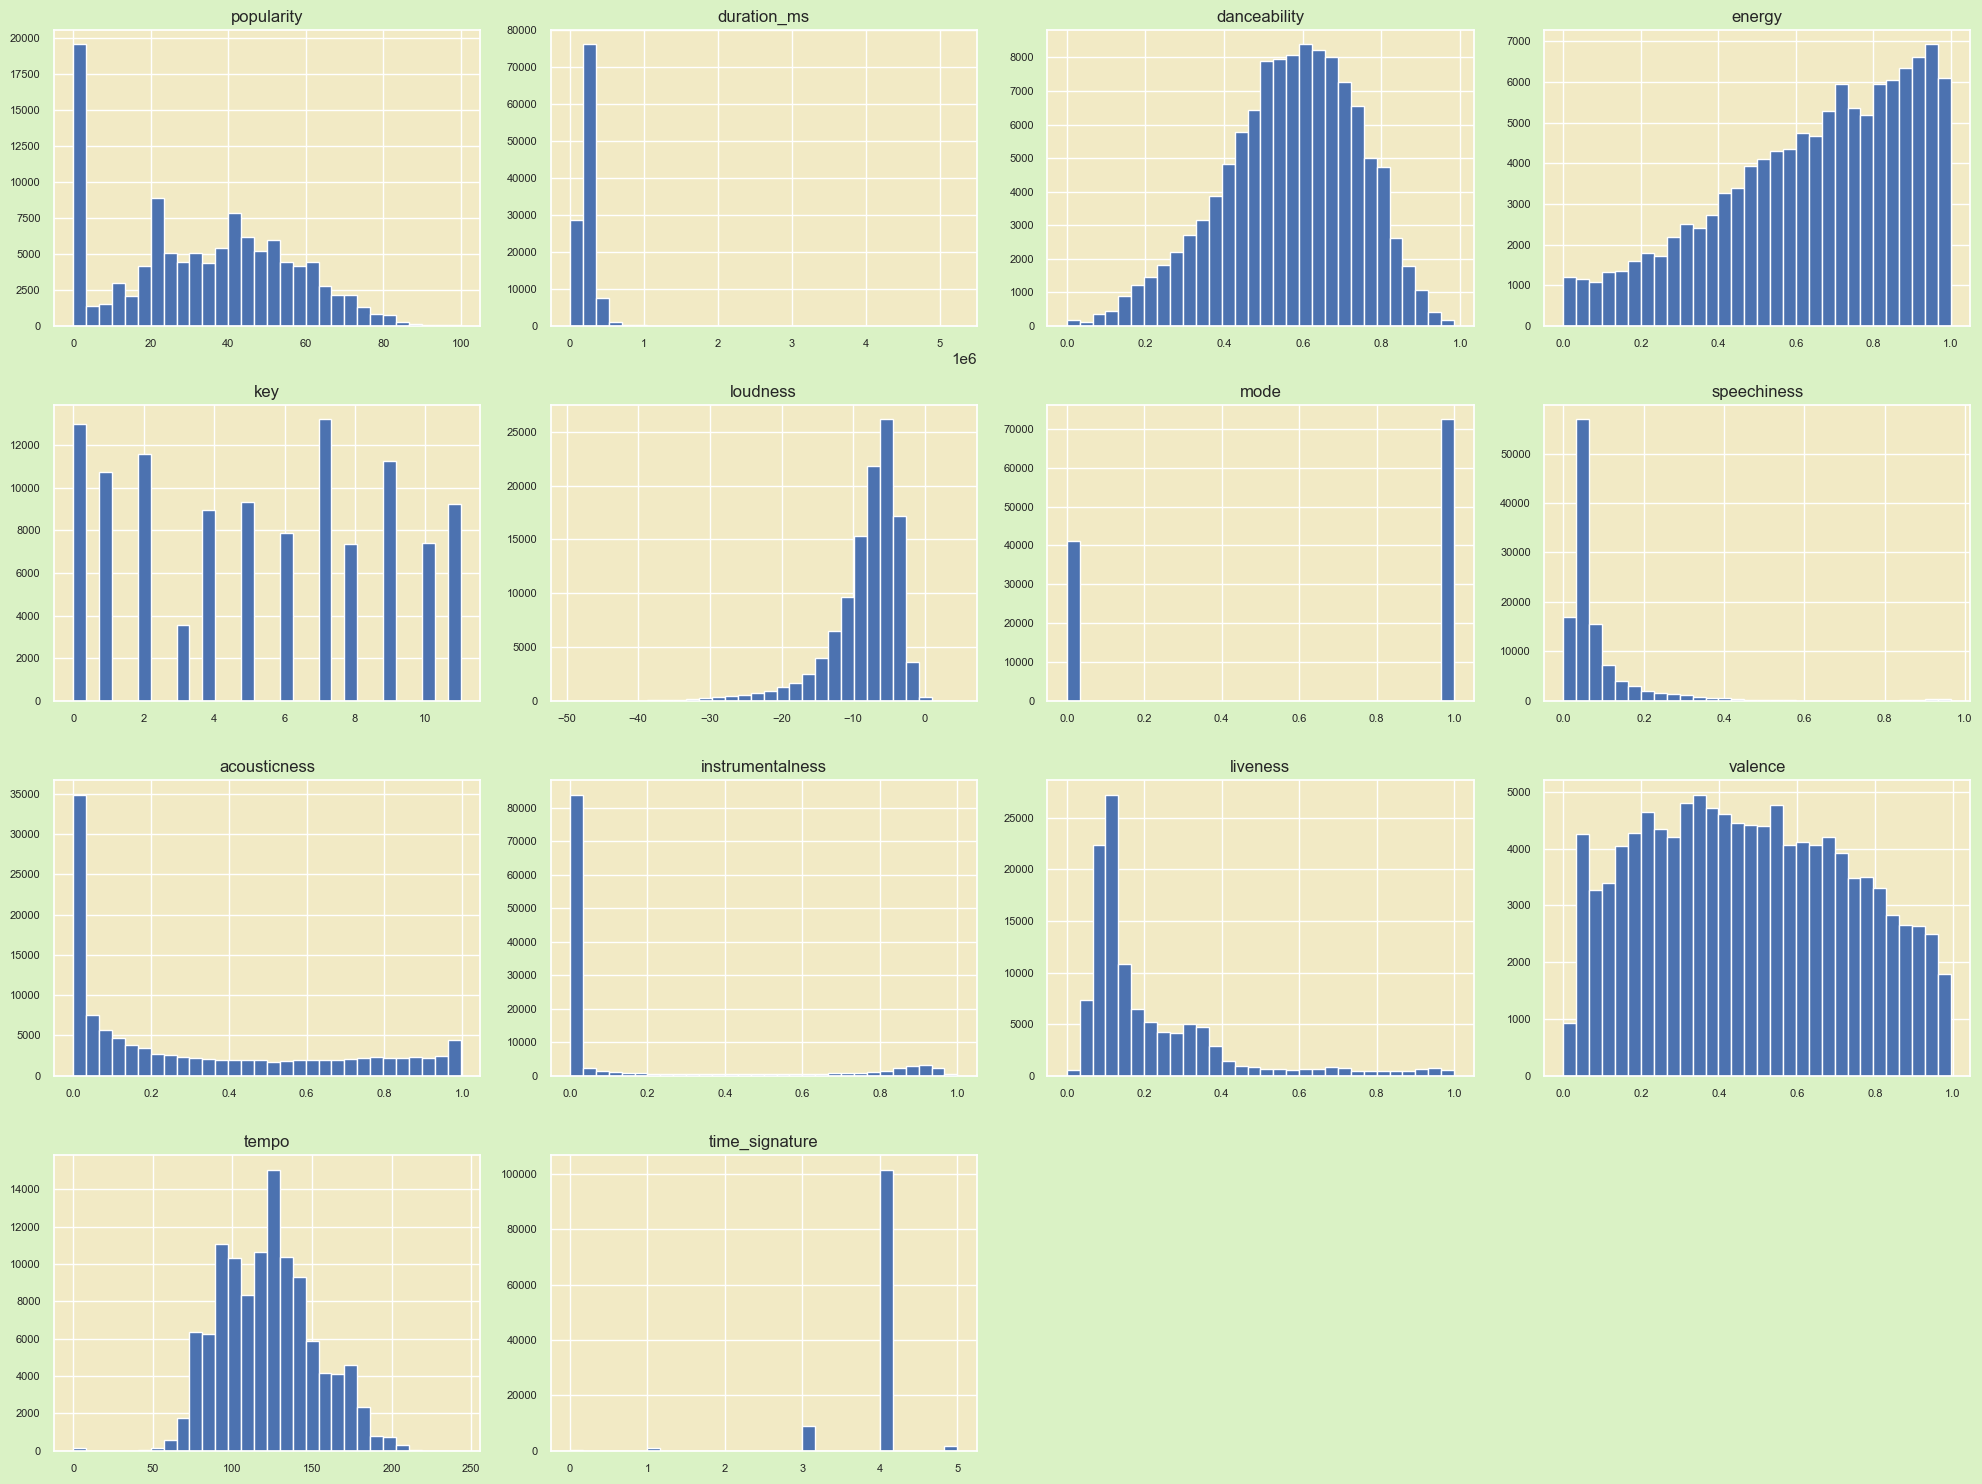

In [232]:
sns.set_style('darkgrid')
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#daf2c5"})
numerical_cols.hist(figsize=(20,15), bins=30, xlabelsize=8, ylabelsize=8)
plt.tight_layout()
plt.show()

# Categorical columns

To identify and isolate categorical features within the dataset, we will extract all columns of categorical data type and assign them to the variable categorical_cols.

In [236]:
categorical_cols = df[df.columns[(df.dtypes == 'object') | (df.dtypes == 'bool')]]
categorical_cols.shape

(113550, 6)

In [238]:
categorical_cols.sample(5)

,track_id,artists,album_name,track_name,explicit,track_genre
11244,7CQHnCZYWafgbHRWIxOu4S,Marianne Faithfull,(70's) Seventies Collected Volume 2,The Ballad Of Lucy Jordan,False,british
46946,5RShCGkfExpEY4mvHXhb0z,Paul Elstak,Hardcore Top 100 - Best Of 2021,Cold Kickin' Ass,True,happy
49681,2xnqrLDwoTVizCIphYhJzB,Mark With a K;Sub Sonik,MoneyShaker (Sub Sonik Remix),MoneyShaker (Sub Sonik Remix),False,hardstyle
21219,6vVFqMUDG316z5EXYHs7fE,Sean Paul;Major Lazer,Mad Love The Prequel,Tip Pon It,False,dancehall
69150,630ZXewu63FXyhoiKpO6tC,Hanumankind,DAMNSON,DAMNSON,True,malay


What is the percentage of missing values?

To start our analysis, we first examined the categorical columns using the info() method.


In [241]:
categorical_cols.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113550 entries, 0 to 113999
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   track_id     113550 non-null  object
 1   artists      113549 non-null  object
 2   album_name   113549 non-null  object
 3   track_name   113549 non-null  object
 4   explicit     113550 non-null  bool  
 5   track_genre  113550 non-null  object
dtypes: bool(1), object(5)
memory usage: 5.3+ MB


We calculated the number of missing values and percentage of missing values for each categorical column.

In [244]:
dist_categorical_cols = pd.DataFrame(
    data = {
        'Missing Values': categorical_cols.isnull().sum(),
        'Missing Percentage': (categorical_cols.isnull().mean() * 100)
    }
)
dist_categorical_cols

,Missing Values,Missing Percentage
track_id,0,0.000000
artists,1,0.000881
album_name,1,0.000881
track_name,1,0.000881
explicit,0,0.000000
track_genre,0,0.000000


We will examine the rows with missing values to consider how to handle them



In [247]:
categorical_cols[categorical_cols.isnull().any(axis=1)]


,track_id,artists,album_name,track_name,explicit,track_genre
65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,False,k-pop


So, all three columns with missing values are in this particular row. We will proceed to drop that row

In [250]:
index_to_drop = df[categorical_cols.isnull().any(axis=1)].index
df.drop(index_to_drop, inplace=True)

print(f'Rows with missing values dropped. Updated DataFrame shape: {df.shape}')

Rows with missing values dropped. Updated DataFrame shape: (113549, 20)


C:\Users\Mahmudur Rahman\AppData\Local\Temp\ipykernel_52912\1861759048.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(index_to_drop, inplace=True)


In [252]:
df.describe(include=['object', 'bool'])

,track_id,artists,album_name,track_name,explicit,track_genre
count,113549,113549,113549,113549,113549,113549
unique,89740,31437,46589,73608,2,114
top,6S3JlDAGk3uu3NtZbPnuhS,The Beatles,Alternative Christmas 2022,Run Rudolph Run,False,acoustic
freq,9,279,195,151,103831,1000


# Visualize unique values

Distribution of explicit


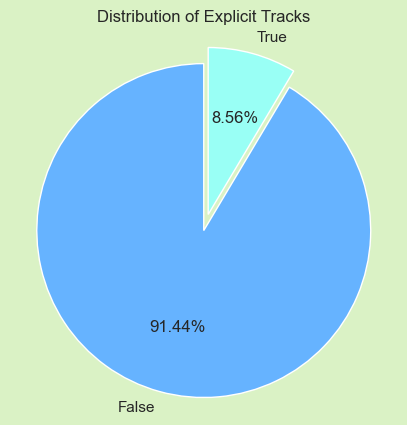

In [255]:
unique_values, value_counts = np.unique(categorical_cols['explicit'], return_counts=True)

fig, ax = plt.subplots(figsize=(5, 5))

# Explode the slice with explicit tracks for emphasis
explode = [0, 0.1]  # Only "yes" (true) will be slightly exploded
colors = ['#66b3ff','#99fff5']

ax.pie(value_counts, labels=unique_values, autopct='%1.2f%%', startangle=90, colors=colors, explode=explode)
ax.axis('equal')
ax.set_title('Distribution of Explicit Tracks')
plt.show()

Dominance of Non-Explicit Tracks: A significant majority of tracks (91.44%) are classified as non-explicit (False).
	Explicit Tracks Proportion: A smaller portion (8.56%) of tracks contain explicit content (True).


# Top of artists, album_name, track_name, track_genre

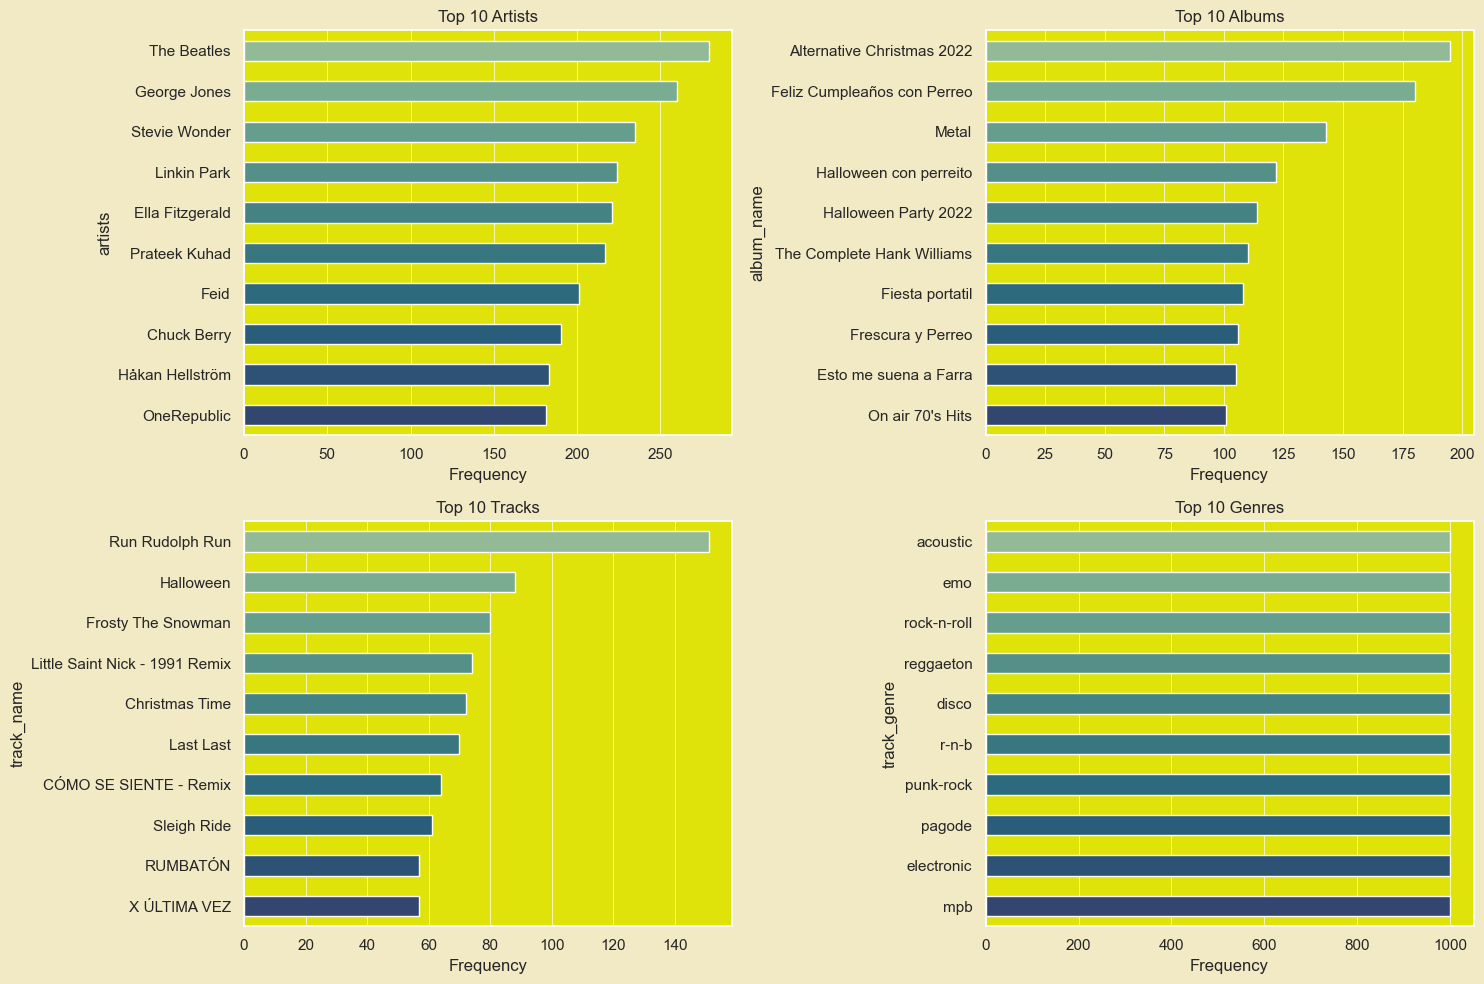

In [259]:
top_n = 10
sns.set_style('darkgrid')
sns.set(rc={"axes.facecolor":"#dfe309","figure.facecolor":"#F2EAC5"})
# Get the top N most frequent artists, albums, tracks, and genres
top_artists = df['artists'].value_counts().head(top_n)
top_albums = df['album_name'].value_counts().head(top_n)
top_tracks = df['track_name'].value_counts().head(top_n)
top_genres = df['track_genre'].value_counts().head(top_n)

# Disable FutureWarning
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)

    # Plotting
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

    # Top N Artists
    sns.barplot(x=top_artists.values, y=top_artists.index, palette="crest", ax=axes[0, 0], orient='h',  zorder=3, width=0.5)
    axes[0, 0].set_title(f'Top {top_n} Artists')
    axes[0, 0].set_xlabel('Frequency')
    axes[0, 0].xaxis.grid(linestyle='-', linewidth=0.5, alpha=1, zorder=0)

    # Top N Albums
    sns.barplot(x=top_albums.values, y=top_albums.index, palette="crest", ax=axes[0, 1], orient='h', zorder=3, width=0.5)
    axes[0, 1].set_title(f'Top {top_n} Albums')
    axes[0, 1].set_xlabel('Frequency')
    axes[0, 1].xaxis.grid(linestyle='-', linewidth=0.5, alpha=1, zorder=0)

    # Top N Tracks
    sns.barplot(x=top_tracks.values, y=top_tracks.index, palette="crest", ax=axes[1, 0], orient='h', zorder=3, width=0.5)
    axes[1, 0].set_title(f'Top {top_n} Tracks')
    axes[1, 0].set_xlabel('Frequency')
    axes[1, 0].xaxis.grid(linestyle='-', linewidth=0.5, alpha=1, zorder=0)

    # Top N Genres
    sns.barplot(x=top_genres.values, y=top_genres.index, palette="crest", ax=axes[1, 1], orient='h', zorder=3, width=0.5)
    axes[1, 1].set_title(f'Top {top_n} Genres')
    axes[1, 1].set_xlabel('Frequency')
    axes[1, 1].xaxis.grid(linestyle='-', linewidth=0.5, alpha=1, zorder=0)

    plt.tight_layout()
    plt.show()

# Abnormal values and outliers

Initial examination of the numerical columns revealed no apparent abnormalities in distribution or value range. To rigorously identify potential outliers, we will employ box plots for visualization.

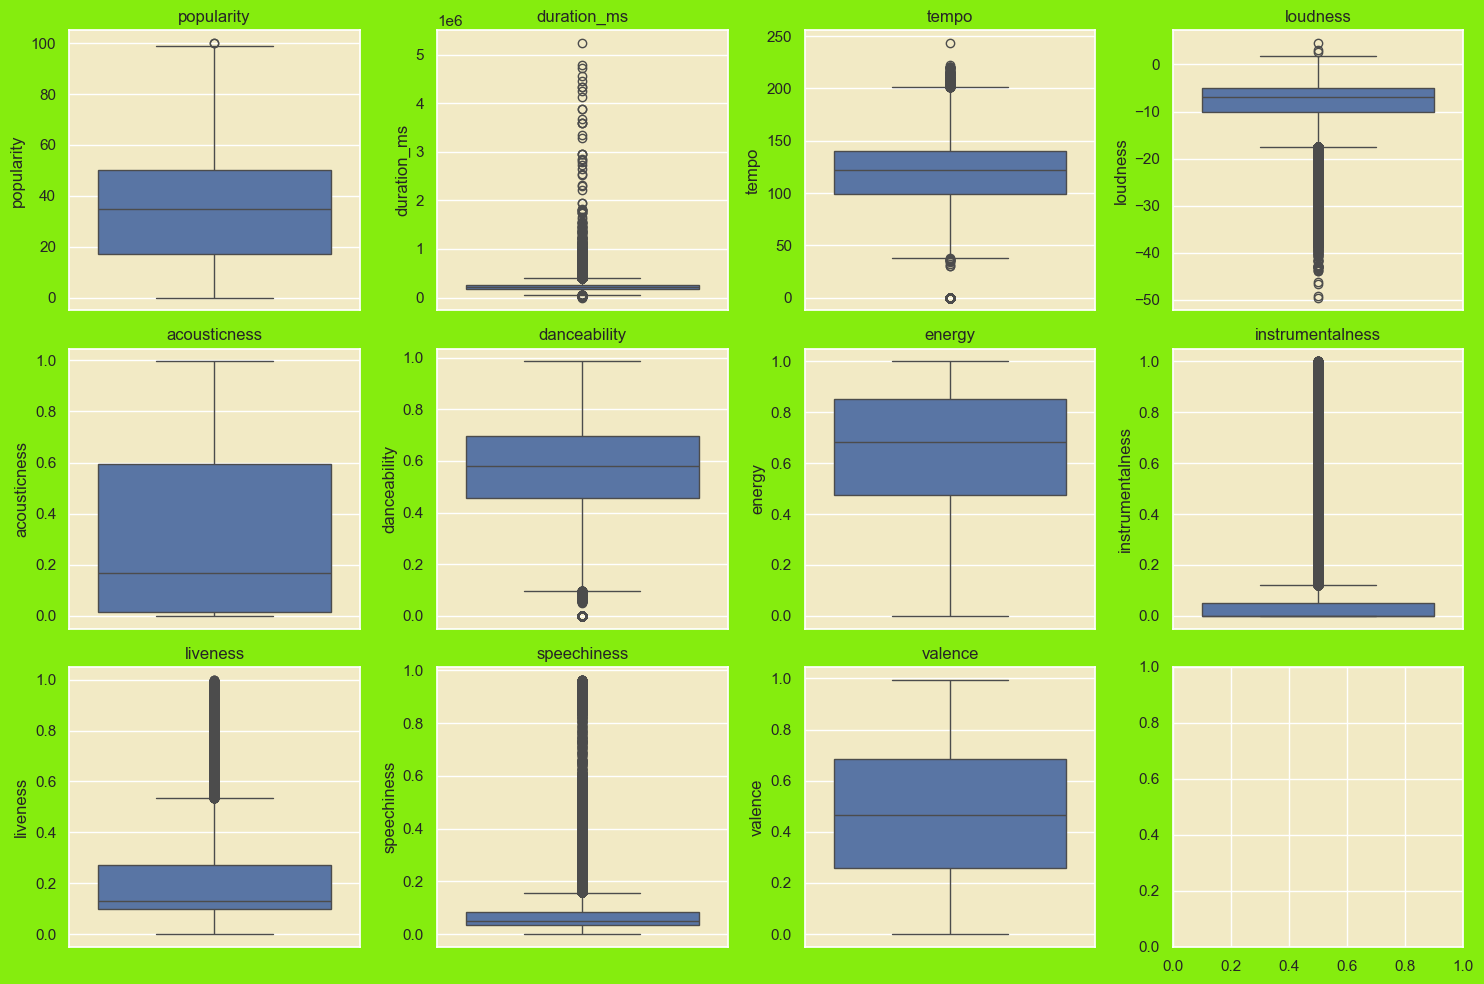

In [263]:
# boxplot for numerical columns
sns.set_style('darkgrid')
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#85ed0e"})
columns = ['popularity', 'duration_ms', 'tempo', 'loudness', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
for i, col in enumerate(columns):
    sns.boxplot(y=col, data=numerical_cols, ax=axes[i//4, i%4])
    axes[i//4, i%4].set_title(col)
plt.tight_layout()
plt.show()

Analysis of popularity, acousticness, energy, and valence revealed an absence of significant outliers. While a single outlier was detected in popularity, its impact was deemed negligible. Conversely, the remaining columns exhibited numerous outliers, which is expected given their continuous nature, broad value ranges, and non-normal distributions. These outliers are attributable to the diverse characteristics inherent in musical compositions and are thus retained to preserve dataset integrity and complexity.

# Correlation between variables

We will use the corr() method to calculate the correlation between numerical columns and visualize it using a heatmap

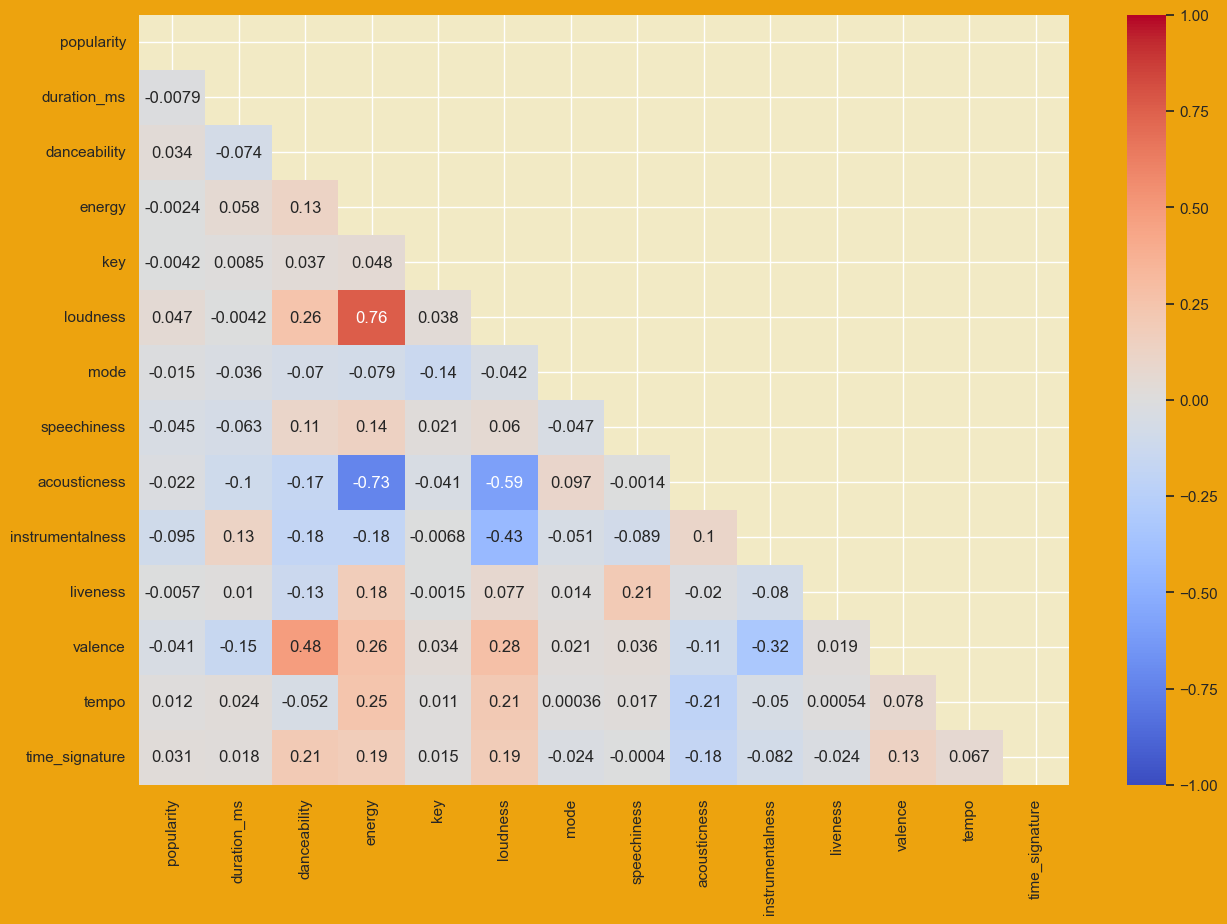

In [268]:
# heatmap for correlation
corr = numerical_cols.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.set_style('white')
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#eda30e"})
plt.figure(figsize=(15, 10))
sns.heatmap(corr, mask=mask, annot=True, vmin=-1, vmax=1,cmap='coolwarm')
plt.show()

Strong Positive Correlations:

•	Loudness and Energy: Songs with higher energy levels tend to be louder
.
•	Danceability and Energy: Danceable songs are often more energeti
c.
•	Valence (positivity) and Danceability: Positive and upbeat songs are often more danceab
le.
•	Duration and Instrumentalness: Longer songs tend to have a higher instrumental cont
ent.
Strong Negative Correlat
ions:
•	Acousticness and Energy: Acoustic songs tend to have lower energy l
evels.
•	Acousticness and Loudness: Acoustic songs are typically les
s loud.
•	Acousticness and Danceability: Acoustic songs are generally less da
nceable.
•	Speechiness and Instrumentalness: Songs with more speech tend to have less instrumental
 content.
Other Notable Cor
relations:
•	Popularity and Loudness: There's a slight positive correlation, suggesting popular songs might
 be louder.
•	Tempo and Energy: There's a weak positive correlation, indicating a possible link between faster tempos and higher energy levels.


# Question 1: How do different genre-related characteristics affect the popularity of songs?

In [272]:
# Number of genres in the dataset
unique_genres = df['track_genre'].unique()
print(len(unique_genres))

114


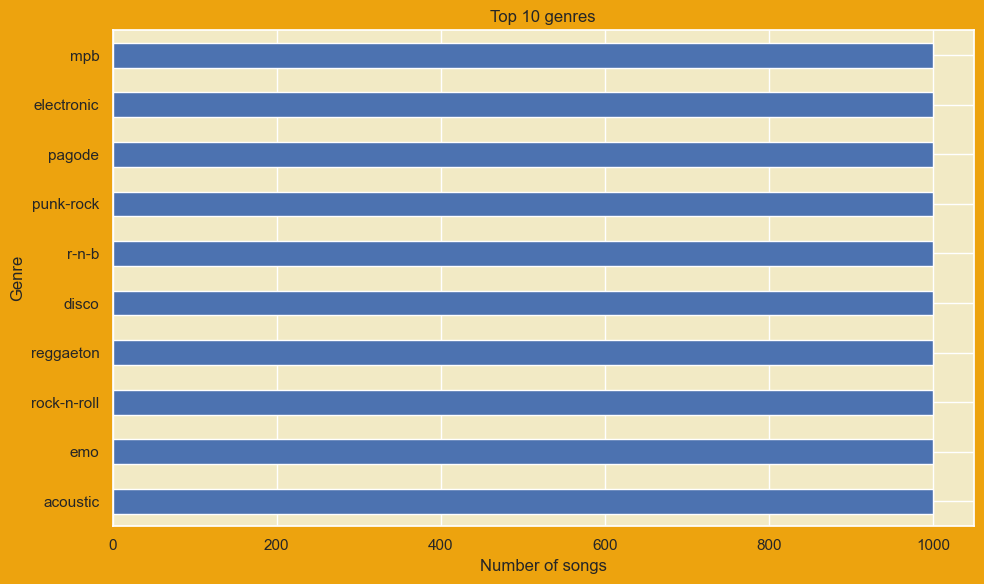

In [274]:
# Top 10 genres with the highest number of songs

genre_counts = df['track_genre'].value_counts()
top_10_genres = genre_counts.head(10)

plt.figure(figsize=(10, 6))
top_10_genres.plot(kind='barh')
plt.title('Top 10 genres')
plt.xlabel('Number of songs')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

Which genre has the highest average popularity score?

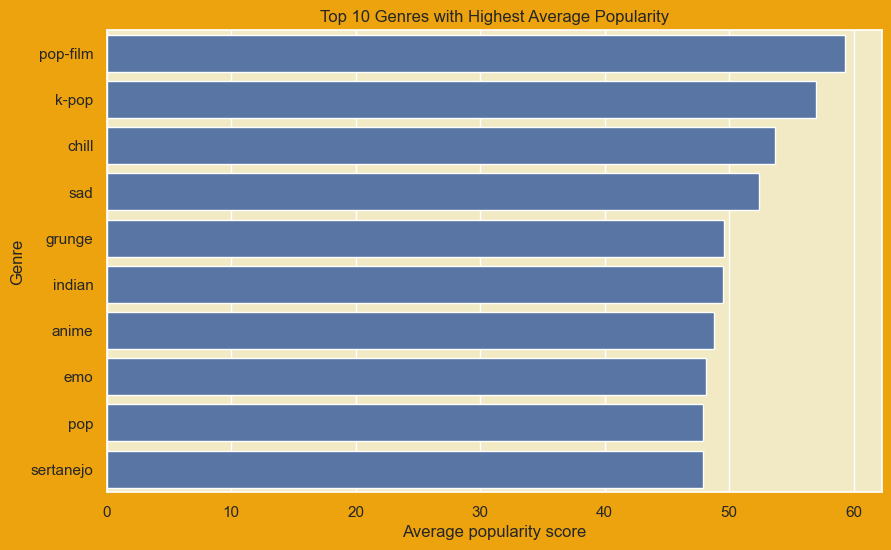

In [277]:
avg_popularity_by_genre = df.groupby('track_genre')['popularity'].mean().reset_index()
top10_popular_genres = avg_popularity_by_genre.nlargest(10, 'popularity')

plt.figure(figsize=(10, 6))
sns.barplot(x='popularity', y='track_genre', data=top10_popular_genres)
plt.title('Top 10 Genres with Highest Average Popularity')
plt.xlabel('Average popularity score')
plt.ylabel('Genre')
plt.show()

Based on the chart, we observe that the highest average popularity score for a genre is approximately 60, not significantly higher than the rest in the top 10.
We also see diversity within each genre, with notable genres including pop-film, k-pop, chill, and sad.

# Which genre has the highest rate of explicit songs?

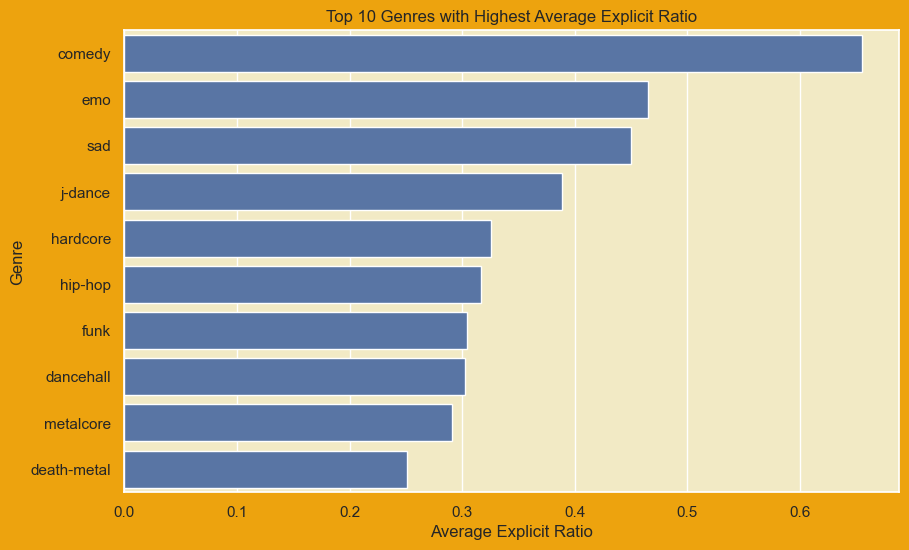

In [281]:
explicit_ratio_by_genre = df.groupby('track_genre')['explicit'].mean().reset_index()
top5_explicit_genres = explicit_ratio_by_genre.nlargest(10, 'explicit')

plt.figure(figsize=(10, 6))
sns.barplot(x='explicit', y='track_genre', data=top5_explicit_genres)
plt.title('Top 10 Genres with Highest Average Explicit Ratio')
plt.xlabel('Average Explicit Ratio')
plt.ylabel('Genre')
plt.show()

Comedy Dominance: The comedy genre exhibits a significantly higher average explicit ratio compared to other genres.
Genre-Specific Language Use:
Comedy: Leverages explicit language for comedic effect and audience engagement.
Emo and Sad: Employs explicit language to convey intense emotions and authenticity.
J-dance: Potentially utilizes explicit language as a form of expression and rebellion.
Audience Preferences: Genres with higher explicit ratios may appeal to listeners seeking music with edgier and more explicit content.

# Which genre has the highest number of songs in the top 0.001% (~110) most popular songs?

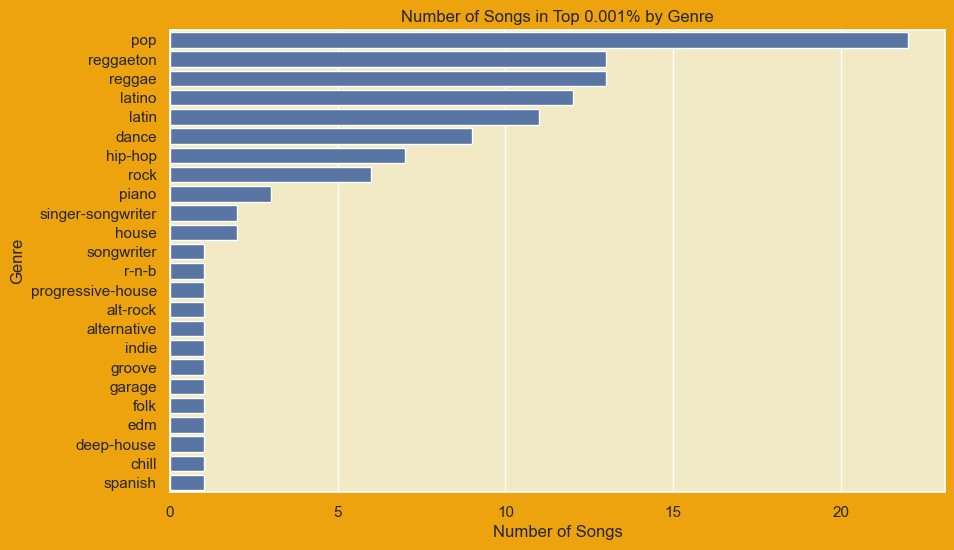

The genre with the most songs in the top 0.001% is pop with 22 songs.


In [285]:
df_sorted = df.sort_values(by='popularity', ascending=False)

top_10_percent = df_sorted.head(int(0.001 * len(df_sorted)))

top_genres_count = top_10_percent.groupby('track_genre').size().reset_index(name='count')
top_genres_count = top_genres_count.sort_values(by='count', ascending=False)

most_common_genre = top_genres_count.loc[top_genres_count['count'].idxmax()]


plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='track_genre', data=top_genres_count)
plt.title('Number of Songs in Top 0.001% by Genre')
plt.xlabel('Number of Songs')
plt.ylabel('Genre')
plt.show()

print(f"The genre with the most songs in the top 0.001% is {most_common_genre['track_genre']} with {most_common_genre['count']} songs.")

# Which genre has the highest ratio of live songs?

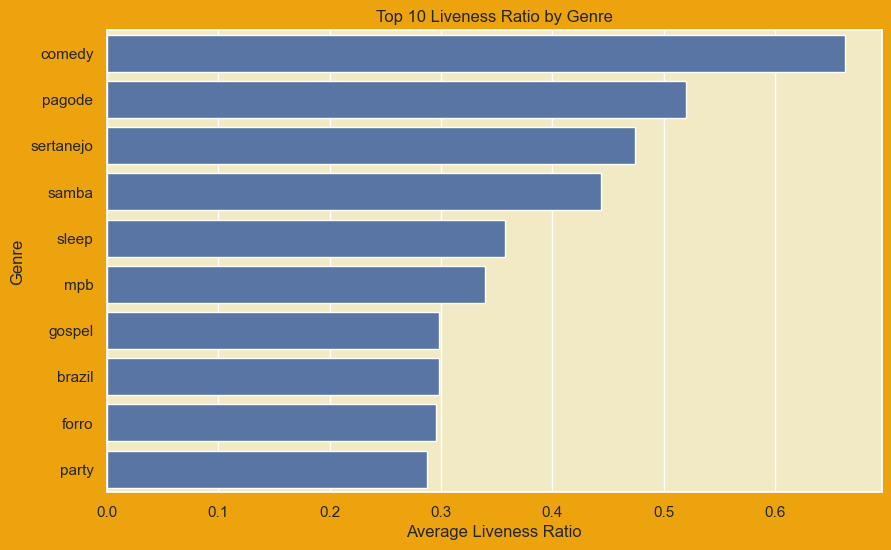

The genre with the highest liveness ratio is comedy with an average liveness ratio of 66.22%.


In [288]:
live_ratio_by_genre = df.groupby('track_genre')['liveness'].mean().reset_index()

top10_live_genres = live_ratio_by_genre.nlargest(10, 'liveness')
most_live_genre = live_ratio_by_genre.loc[live_ratio_by_genre['liveness'].idxmax()]

plt.figure(figsize=(10, 6))
sns.barplot(x='liveness', y='track_genre', data=top10_live_genres)
plt.title('Top 10 Liveness Ratio by Genre')
plt.xlabel('Average Liveness Ratio')
plt.ylabel('Genre')
plt.show()
print(f"The genre with the highest liveness ratio is {most_live_genre['track_genre']} with an average liveness ratio of {most_live_genre['liveness']:.2%}.")

# Based on the Correlation section in the Exploring and Preprocessing file, we find that the highest correlation is between loudness and energy.

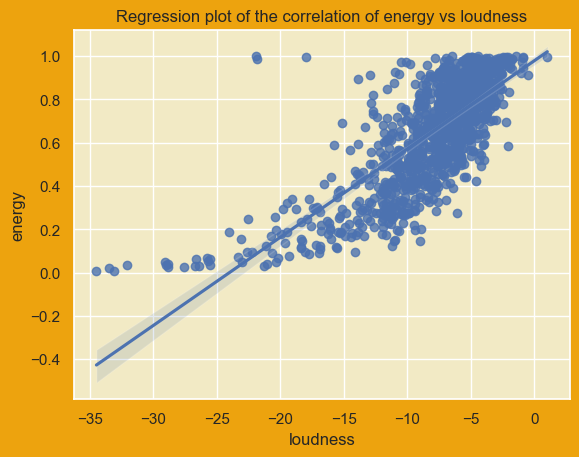

In [291]:
sample = df.sample(int(0.01 * len(df)))
sns.regplot(data=sample, y="energy", x="loudness", color="b")
plt.title("Regression plot of the correlation of energy vs loudness")
plt.show()

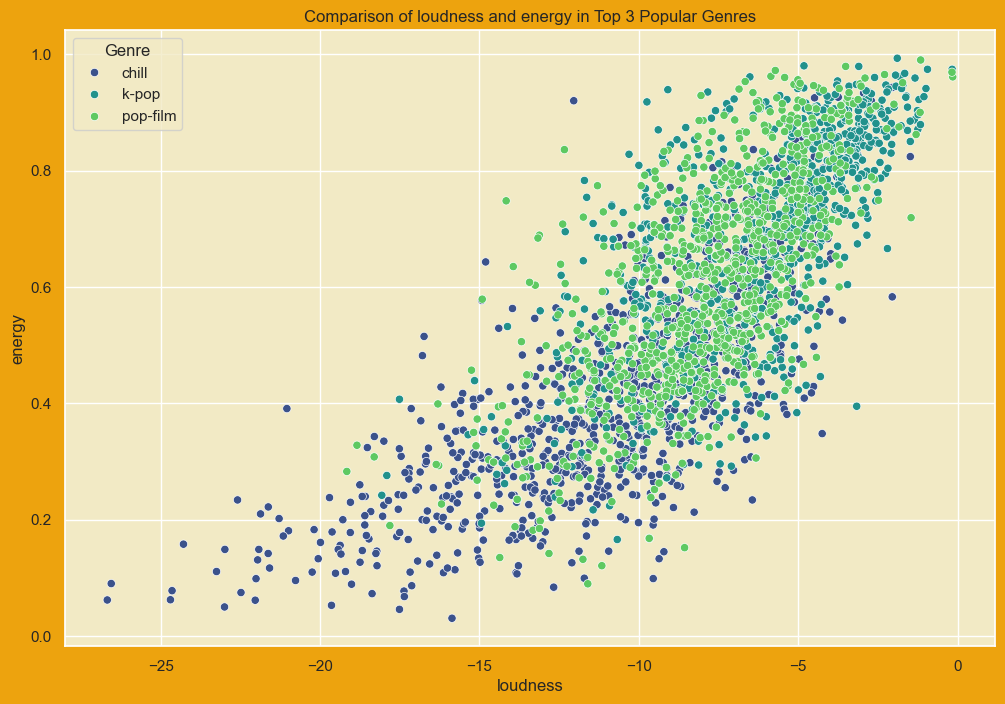

In [293]:
avg_popularity_by_genre = df.groupby('track_genre')['popularity'].mean().reset_index()

top3_popular_genres = avg_popularity_by_genre.nlargest(3, 'popularity')

top3_genre_data = df[df['track_genre'].isin(top3_popular_genres['track_genre'])]

plt.figure(figsize=(12, 8))
sns.scatterplot(x='loudness', y='energy', hue='track_genre', data=top3_genre_data, palette='viridis')
plt.title('Comparison of loudness and energy in Top 3 Popular Genres')
plt.xlabel('loudness')
plt.ylabel('energy')
plt.legend(title='Genre')
plt.show()

# Question 2: How should artists choose their music genres?

Top genres

In [297]:
top_genres = df.groupby('track_genre')['popularity'].mean()
top_genres = top_genres[top_genres >= 35].sort_values(ascending=False)
top_genres[:10]

track_genre
pop-film     59.280280
k-pop        56.963928
chill        53.704705
sad          52.379000
grunge       49.582583
indian       49.528529
anime        48.766767
emo          48.128000
pop          47.903323
sertanejo    47.866000
Name: popularity, dtype: float64

Top Artists 

In [300]:
copy_df = df.copy()
copy_df['artists'] = copy_df['artists'].str.split(';')
copy_df = copy_df.explode('artists')

In [302]:
#We now can group the data by artist and calculate the mean popularity of songs by each artist to determine the top artists.

top_artists = copy_df.groupby('artists')['popularity'].mean()
top_artists = top_artists[top_artists >= 70].sort_values(ascending=False)
top_artists[:10]

artists
Bizarrap            99.0
Quevedo             99.0
Harry Styles        92.0
Luar La L           90.5
Beach Weather       90.0
Pablo Pesadilla     88.0
Polimá Westcoast    88.0
Olivia Rodrigo      87.4
Lewis Capaldi       87.0
Yung Gravy          87.0
Name: popularity, dtype: float64

Genres of top artists

In [305]:
top_artists = top_artists.index.tolist()
genres_artists = df[df['artists'].isin(top_artists)]['track_genre'].unique().tolist()
genres_artists[:10]

['alt-rock',
 'alternative',
 'blues',
 'british',
 'cantopop',
 'chill',
 'country',
 'dance',
 'disco',
 'edm']

In [307]:
!pip install matplotlib_venn

Top genres vs. genres of top artists

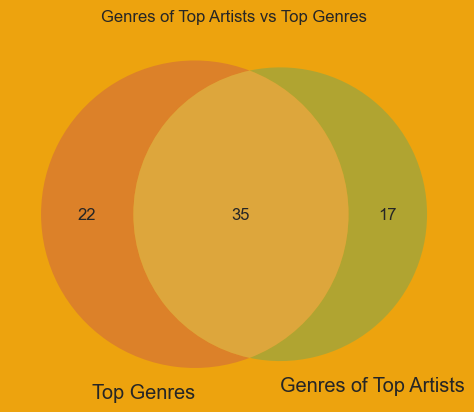

In [310]:
from matplotlib_venn import venn2
top_genres = top_genres.index.tolist()
venn2([set(top_genres), set(genres_artists)], set_labels=('Top Genres', 'Genres of Top Artists'))
plt.title('Genres of Top Artists vs Top Genres')
plt.show()


Popularities of each set of genres

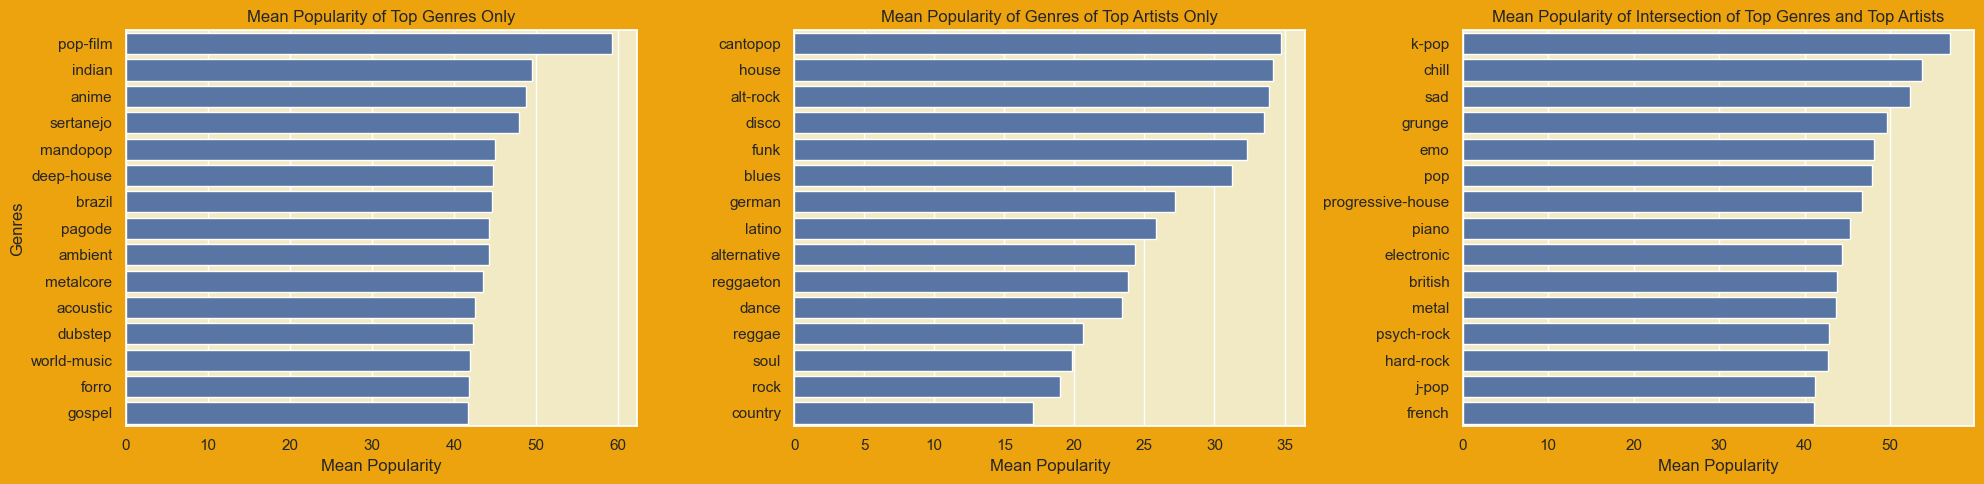

In [313]:
top_genres_only = list(set(top_genres) - set(genres_artists))
genres_artists_only = list(set(genres_artists) - set(top_genres))
intersection = list(set(top_genres) & set(genres_artists))

top_genres_only = df[df['track_genre'].isin(top_genres_only)].groupby('track_genre')['popularity'].mean().sort_values(ascending=False).head(15)
genres_artists_only = df[df['track_genre'].isin(genres_artists_only)].groupby('track_genre')['popularity'].mean().sort_values(ascending=False).head(15)
intersection = df[df['track_genre'].isin(intersection)].groupby('track_genre')['popularity'].mean().sort_values(ascending=False).head(15)

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.barplot(x=top_genres_only.values, y=top_genres_only.index, ax=axes[0])
axes[0].set_title('Mean Popularity of Top Genres Only')
axes[0].set_xlabel('Mean Popularity')
axes[0].set_ylabel('Genres')

sns.barplot(x=genres_artists_only.values, y=genres_artists_only.index, ax=axes[1])
axes[1].set_title('Mean Popularity of Genres of Top Artists Only')
axes[1].set_xlabel('Mean Popularity')
axes[1].set_ylabel('')

sns.barplot(x=intersection.values, y=intersection.index, ax=axes[2])
axes[2].set_title('Mean Popularity of Intersection of Top Genres and Top Artists')
axes[2].set_xlabel('Mean Popularity')
axes[2].set_ylabel('')


plt.tight_layout()
plt.show()

# Distribution of number of genres

In [316]:
copy_df = df.copy()
copy_df['artists'] = copy_df['artists'].str.split(';')
copy_df = copy_df.explode('artists')

artist_genre_count = copy_df.groupby('artists')['track_genre'].nunique().sort_values(ascending=False)

top_artists = copy_df.groupby('artists')['popularity'].mean()
top_artists = top_artists[top_artists >= 60].sort_values(ascending=False)
top_artists = top_artists.index.tolist()

copy_df = copy_df[copy_df['artists'].isin(top_artists)]

top_artist_genre_count = copy_df.groupby('artists')['track_genre'].nunique().sort_values(ascending=False)

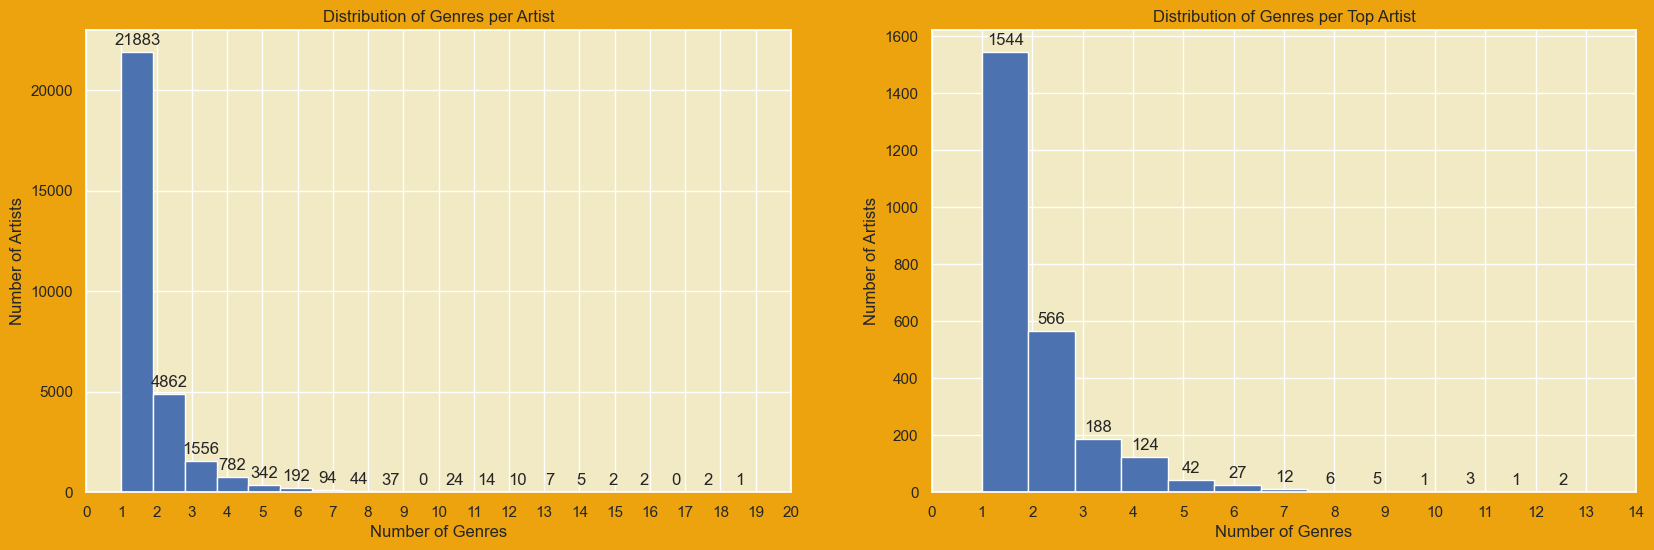

In [318]:
# we will create 2 histograms to visualize the distribution of the number of genres for all artists and top artists.
# Plot distribution of genres per artist and top artists
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
sns.set_style('darkgrid')
axes[0].hist(artist_genre_count, bins=20)
axes[0].set_title('Distribution of Genres per Artist')
axes[0].set_xlabel('Number of Genres')
axes[0].set_ylabel('Number of Artists')
axes[0].bar_label(axes[0].containers[0], padding=3)
axes[0].set_xticks(np.arange(0, 21, 1))

axes[1].hist(top_artist_genre_count, bins=13)
axes[1].set_title('Distribution of Genres per Top Artist')
axes[1].set_xlabel('Number of Genres')
axes[1].set_ylabel('Number of Artists')
axes[1].bar_label(axes[1].containers[0], padding=3)
axes[1].set_xticks(np.arange(0, 15, 1))

plt.show()

In [320]:
artist_more_than_4_genres = artist_genre_count[artist_genre_count >= 4].index.tolist()
df_more_than_4_genres = copy_df[copy_df['artists'].isin(artist_more_than_4_genres)]

diverse_artists = df_more_than_4_genres.groupby('artists')['popularity'].mean()

artist_less_than_4_genres = artist_genre_count[artist_genre_count < 4].index.tolist()
df_less_than_4_genres = copy_df[copy_df['artists'].isin(artist_less_than_4_genres)]

less_diverse_artists = df_less_than_4_genres.groupby('artists')['popularity'].mean()

Create 4 charts to visualize the popularity of artists with a narrow range of genres and those with a broad range of genres.
2 histograms to visualize the distribution of popularity scores for artists with a narrow range of genres and those with a broad range of genres.
2 bar charts to visualize the mean popularity scores of top artists with a narrow range of genres and those with a broad range of genres.

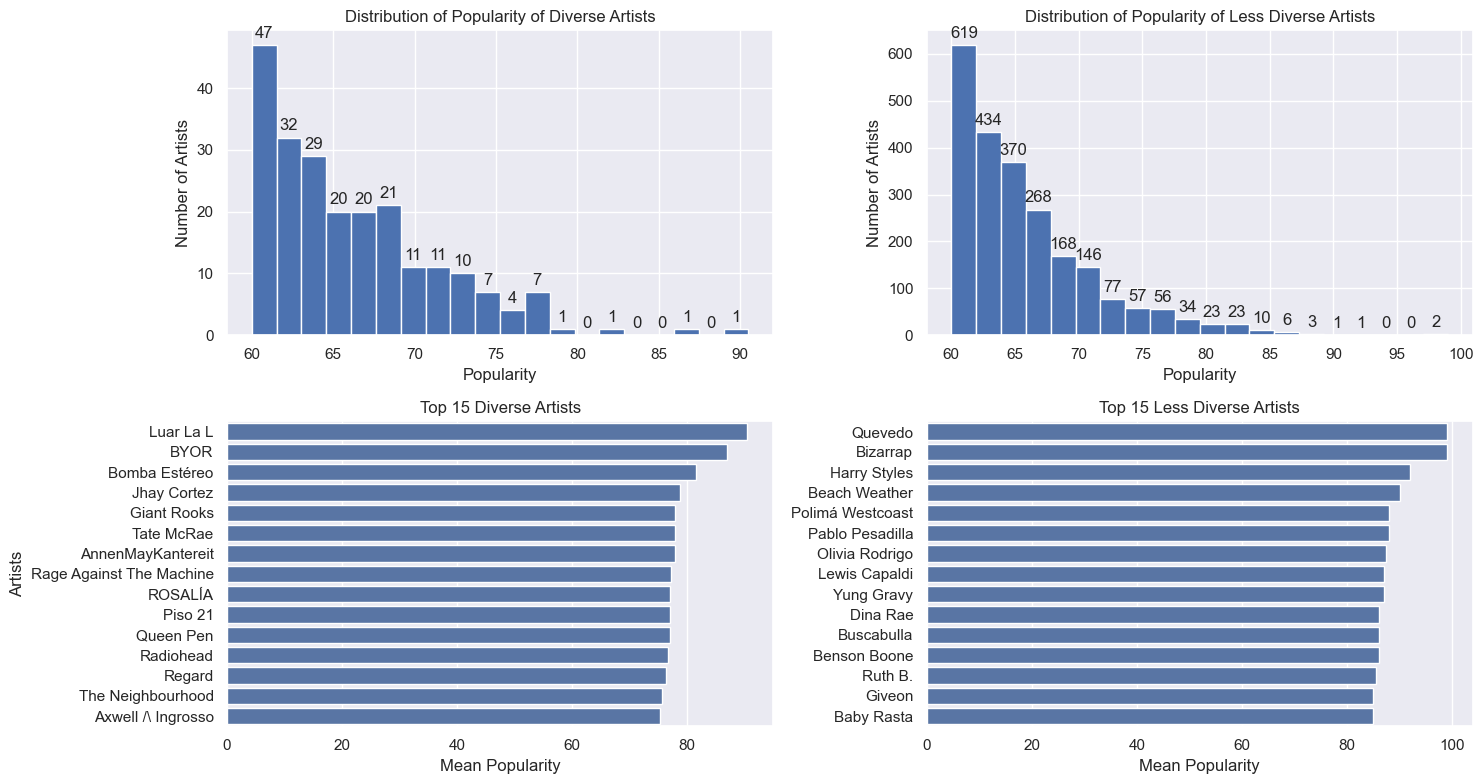

In [323]:
fig, axes = plt.subplots(2, 2, figsize=(15, 8))
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})
axes[0, 0].hist(diverse_artists, bins=20)
axes[0, 0].set_title('Distribution of Popularity of Diverse Artists')
axes[0, 0].set_xlabel('Popularity')
axes[0, 0].set_ylabel('Number of Artists')
axes[0, 0].bar_label(axes[0, 0].containers[0], padding=3)

axes[0, 1].hist(less_diverse_artists, bins=20)
axes[0, 1].set_title('Distribution of Popularity of Less Diverse Artists')
axes[0, 1].set_xlabel('Popularity')
axes[0, 1].set_ylabel('Number of Artists')
axes[0, 1].bar_label(axes[0, 1].containers[0], padding=3)

sns.barplot(x=diverse_artists.sort_values(ascending=False).head(15).values, y=diverse_artists.sort_values(ascending=False).head(15).index, ax=axes[1, 0])
axes[1, 0].set_title('Top 15 Diverse Artists')
axes[1, 0].set_xlabel('Mean Popularity')
axes[1, 0].set_ylabel('Artists')

sns.barplot(x=less_diverse_artists.sort_values(ascending=False).head(15).values, y=less_diverse_artists.sort_values(ascending=False).head(15).index, ax=axes[1, 1])
axes[1, 1].set_title('Top 15 Less Diverse Artists')
axes[1, 1].set_xlabel('Mean Popularity')
axes[1, 1].set_ylabel('')

plt.tight_layout()
plt.show()


# Question 3 How can we suggest songs based on a user's current listening preferences?



In [326]:
df = df.drop(['time_signature', 'key'], axis=1)
df.head(5)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,acoustic


Because dataset can contains duplicate rows that have the same song in different albums or singles, we need to remove these duplicates.

In [329]:
df.drop_duplicates(subset=['track_id'], inplace=True)
df.head(5)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,acoustic


In [331]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()

numerical_cols = df.select_dtypes(include=np.number).columns
data_norm = pd.DataFrame(scaler.fit_transform(df[numerical_cols]), columns=numerical_cols, index=df['track_id'])

In [333]:
# listTrackNameListened = ['Heavy Heart', 'Somebody Else - Acoustic', 'Always Be My Baby']
trackNameListened = "Knockin' On Heaven's Door"
track_id = df[(df['track_name'] == trackNameListened)][['track_id']]
track_id = track_id.values[0][0]

target_track = list(data_norm.loc[track_id])

In [335]:
data_result = pd.DataFrame()
data_result['euclidean'] = [distance.euclidean(obj, target_track) for index, obj in data_norm.iterrows()]
data_result['track_id'] = data_norm.index

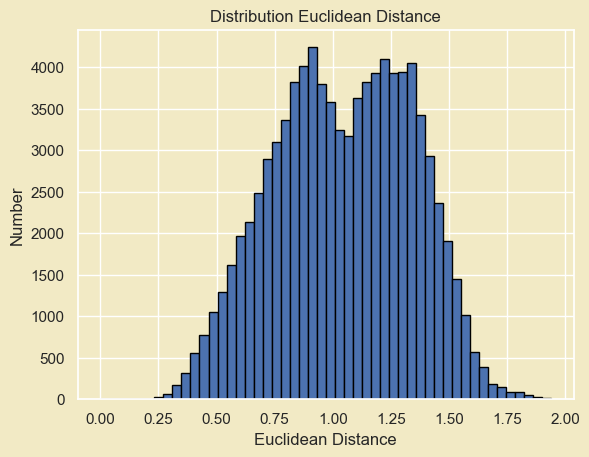

In [337]:
plt.hist(data_result['euclidean'], bins=50, edgecolor='black')

plt.xlabel('Euclidean Distance')
plt.ylabel('Number')

plt.title('Distribution Euclidean Distance')

plt.show()

In [339]:
data_rec = data_result.sort_values(by=['euclidean']).iloc[:6]


In [341]:
data_init = df.set_index(df.loc[:, 'track_id'])
track_list = pd.DataFrame()
for i in list(data_rec.loc[:, 'track_id']):
    if i in list(df.loc[:, 'track_id']):
        track_info = data_init.loc[[i], ['track_name', 'artists']]
        track_list = pd.concat([track_list, track_info], ignore_index=True)



Recommend the top 5 tracks for the user in descending order of similarity, based on the calculated Euclidean distances.


In [344]:
recomended = track_list.values.tolist()
print(f"""You've just listened:  \n \t - {recomended[0][0]} - {recomended[0][1]} 
Now you may listen : 
\n \t - '{recomended[1][0]} - {recomended[1][1]}'
Or any of:
\n \t - '{recomended[2][0]} - {recomended[2][1]}' 
\n \t - '{recomended[3][0]} - {recomended[3][1]}'
\n \t - '{recomended[4][0]} - {recomended[4][1]}'
\n \t - '{recomended[5][0]} - {recomended[5][1]}'  """)

You've just listened:  
 	 - Knockin' On Heaven's Door - Bob Dylan 
Now you may listen : 

 	 - 'we fell in love in october - girl in red'
Or any of:

 	 - 'Shine - Collective Soul' 

 	 - 'Yellow Ledbetter - Pearl Jam'

 	 - 'Seasons - Chris Cornell'

 	 - 'Amanda - Boston'  
